In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Read file
csv_path = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv"
df = pd.read_csv(csv_path, encoding='utf-8')

print(df.dtypes)
df = df.drop(columns=['Unnamed: 0'])

print('Dataset shape:', df.shape)

Unnamed: 0                    int64
model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object
Dataset shape: (4843, 14)


In [188]:
print('Dataset shape:', df.shape)
print('Column types:')

Dataset shape: (4843, 14)
Column types:


In [189]:
# Separate features and target
X = df.drop(columns=['rental_price_per_day'])
y = df['rental_price_per_day']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print('Categorical columns:', cat_cols)
print('Numerical columns:', num_cols)

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print('\
Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

Categorical columns: ['model_key', 'fuel', 'paint_color', 'car_type']
Numerical columns: ['mileage', 'engine_power']
Training set size: (3874, 13)
Test set size: (969, 13)


- Train Random Forest model and Gradient Boosting model on training data
- Make predictions using both models on test data
- Evaluate and print performance metrics for both models

In [190]:
# Train models and compare performance
from tqdm import tqdm

# Train Random Forest
print('Training Random Forest...')
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
print('Training Gradient Boosting...')
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate models
print('\
=== Model Performance ===')
print('\
Random Forest:')
print('MAE:', round(mean_absolute_error(y_test, rf_pred), 2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, rf_pred)), 2))
print('R2 Score:', round(r2_score(y_test, rf_pred), 4))

print('\
Gradient Boosting:')
print('MAE:', round(mean_absolute_error(y_test, gb_pred), 2))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, gb_pred)), 2))
print('R2 Score:', round(r2_score(y_test, gb_pred), 4))

Training Random Forest...
Training Gradient Boosting...
=== Model Performance ===
Random Forest:
MAE: 10.95
RMSE: 16.99
R2 Score: 0.7259
Gradient Boosting:
MAE: 10.57
RMSE: 16.4
R2 Score: 0.7446


Visualize the importance of features in predicting prices using a Gradient Boosting model.
- Create a DataFrame to store feature names and their importance scores.
- Sorte the DataFrame by importance in descending order.
- Plotte a horizontal bar chart to display feature importance.

                      feature  importance
2                engine_power    0.476205
1                     mileage    0.276605
5                    car_type    0.053213
0                   model_key    0.049724
7                     has_gps    0.046045
10      has_getaround_connect    0.031651
9               automatic_car    0.019961
3                        fuel    0.018053
12               winter_tires    0.008706
4                 paint_color    0.006420
11        has_speed_regulator    0.005476
6   private_parking_available    0.004559
8        has_air_conditioning    0.003382


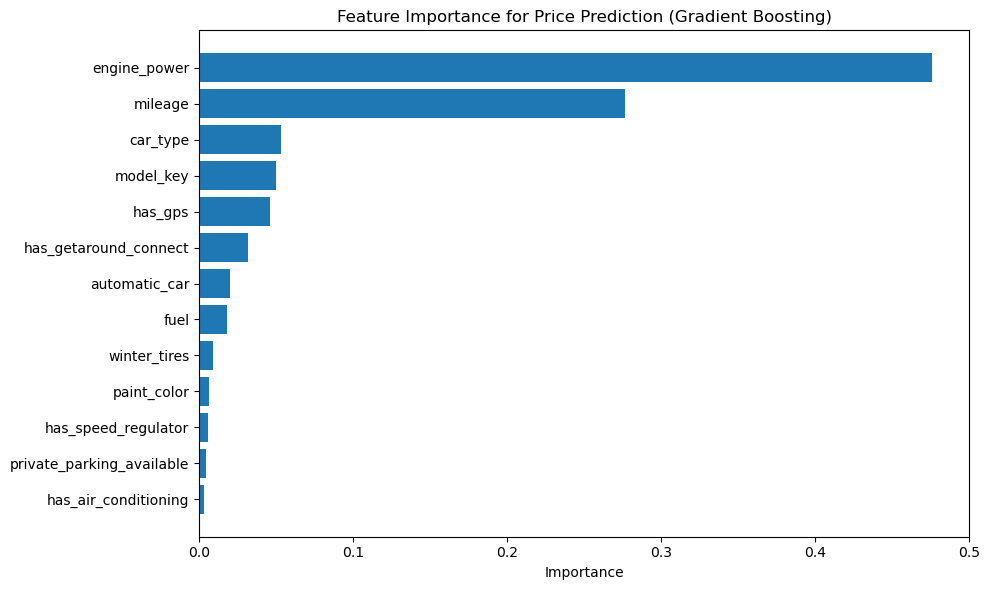

In [191]:
# Feature importance analysis

import matplotlib.pyplot as plt

# Get feature importance from best model (Gradient Boosting)
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Price Prediction (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 Visualize the accuracy of a Gradient Boosting model by comparing actual rental prices to predicted prices and displayed a sample of predictions with their differences.
- Create a scatter plot of actual vs predicted prices
- Add a reference line for perfect predictions
- Label the axes and title the plot
- Display the plot
- Create a DataFrame to show sample actual and predicted prices along with their differences
- Print the sample predictions

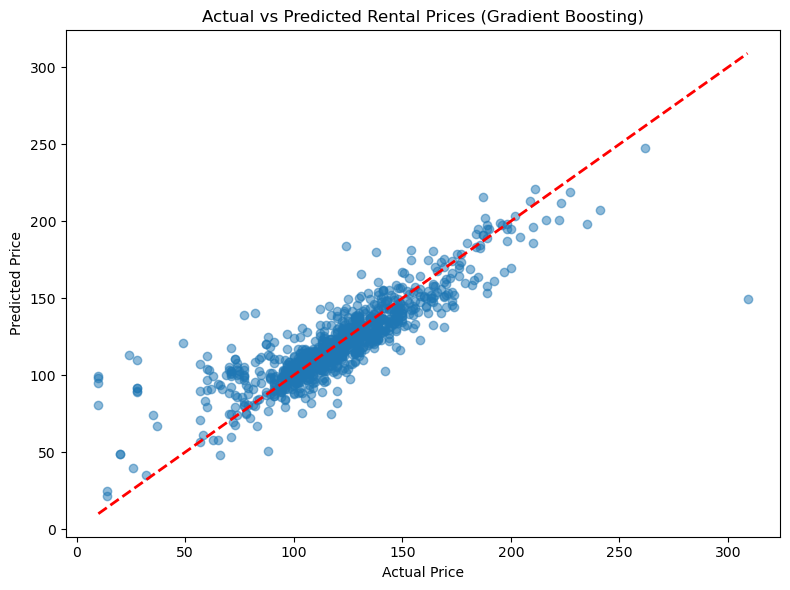

Sample Predictions:
   Actual_Price  Predicted_Price  Difference
0           152           132.67      -19.33
1           120           111.68       -8.32
2           158           151.21       -6.79
3           110           108.36       -1.64
4           148           133.74      -14.26
5            82            80.01       -1.99
6            97           101.90        4.90
7           138           127.47      -10.53
8           148           136.22      -11.78
9           128           118.27       -9.73


In [192]:
# Visualize actual vs predicted prices

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Rental Prices (Gradient Boosting)')
plt.tight_layout()
plt.show()

# Show some example predictions
comparison = pd.DataFrame({
    'Actual_Price': y_test.values[:10],
    'Predicted_Price': gb_pred[:10].round(2),
    'Difference': (gb_pred[:10] - y_test.values[:10]).round(2)
})
print('\
Sample Predictions:')
print(comparison)

This function predicts the optimal rental price for a car based on its features and characteristics.
- Define a function to predict car rental price
- Create an input dataframe with car features
- Encode categorical variables using label encoders
- Use a pre-trained model to predict the price
- Return the rounded predicted price

In [193]:
# Create a function to predict optimal price for new cars
# to provide a practical tool for car owners to get price recommendations

def predict_optimal_price(model_key, mileage, engine_power, fuel, paint_color, car_type,
                         private_parking_available, has_gps, has_air_conditioning,
                         automatic_car, has_getaround_connect, has_speed_regulator, winter_tires):
    """
    Predict optimal rental price for a car based on its features
    """
    # Create input dataframe
    input_data = pd.DataFrame({
        'model_key': [model_key],
        'mileage': [mileage],
        'engine_power': [engine_power],
        'fuel': [fuel],
        'paint_color': [paint_color],
        'car_type': [car_type],
        'private_parking_available': [private_parking_available],
        'has_gps': [has_gps],
        'has_air_conditioning': [has_air_conditioning],
        'automatic_car': [automatic_car],
        'has_getaround_connect': [has_getaround_connect],
        'has_speed_regulator': [has_speed_regulator],
        'winter_tires': [winter_tires]
    })
    
    # Encode categorical variables
    for col in cat_cols:
        if col in label_encoders:
            try:
                input_data[col] = label_encoders[col].transform(input_data[col].astype(str))
            except:
                # If unknown category, use most common
                input_data[col] = 0
    
    # Predict
    predicted_price = gb_model.predict(input_data)[0]
    return round(predicted_price, 2)

# Test the function with example
example_price = predict_optimal_price(
    model_key='Citroën',
    mileage=50000,
    engine_power=150,
    fuel='diesel',
    paint_color='black',
    car_type='sedan',
    private_parking_available=True,
    has_gps=True,
    has_air_conditioning=True,
    automatic_car=False,
    has_getaround_connect=True,
    has_speed_regulator=True,
    winter_tires=True
)

print('Example prediction for a Citroën with 50k mileage, 150 engine power:')
print('Optimal rental price per day: €' + str(example_price))

Example prediction for a Citroën with 50k mileage, 150 engine power:
Optimal rental price per day: €139.46


In [194]:
import mlflow.pyfunc
import pandas as pd

mlflow_model_path = "../mlflow_model"

class PriceModel(mlflow.pyfunc.PythonModel):
    def __init__(self):
        # Initialize safely to avoid AttributeError during save
        self.model = None
        self.label_encoders = {}
        self.cat_cols = []

    def load_context(self, context):
        import pickle, json
        self.model = pickle.load(open(context.artifacts["gb_model"], "rb"))
        self.label_encoders = pickle.load(open(context.artifacts["label_encoders"], "rb"))
        self.cat_cols = json.load(open(context.artifacts["cat_cols"], "r"))

    def predict(self, context, model_input: pd.DataFrame):
        # Handle MLflow's validation call (when model=None)
        if self.model is None:
            # Return a dummy prediction (MLflow just validates schema)
            return [0.0] * len(model_input)

        df = model_input.copy()
        for col in self.cat_cols:
            if col in self.label_encoders:
                try:
                    df[col] = self.label_encoders[col].transform(df[col].astype(str))
                except Exception:
                    df[col] = 0
        return self.model.predict(df)

# Example input
input_example = pd.DataFrame({
    "model_key": ["Citroën"],
    "mileage": [50000],
    "engine_power": [150],
    "fuel": ["diesel"],
    "paint_color": ["black"],
    "car_type": ["sedan"],
    "private_parking_available": [True],
    "has_gps": [True],
    "has_air_conditioning": [True],
    "automatic_car": [False],
    "has_getaround_connect": [True],
    "has_speed_regulator": [True],
    "winter_tires": [True]
})

# Save the MLflow model safely
mlflow.pyfunc.save_model(
    path=mlflow_model_path,
    python_model=PriceModel(),
    artifacts={
        "gb_model": "../models/gb_model.pkl",
        "label_encoders": "../models/label_encoders.pkl",
        "cat_cols": "../models/cat_cols.json",
    },
    input_example=input_example.to_dict(orient="list")
)

print(f"✅ MLflow model successfully saved to: {mlflow_model_path}")

# ✅ Optional test: Load and predict
loaded_model = mlflow.pyfunc.load_model("../mlflow_model")
pred = loaded_model.predict(input_example)
print("Predicted price:", pred)


2025/10/12 18:04:11 INFO mlflow.types.utils: Unsupported type hint: <class 'pandas.core.frame.DataFrame'>, skipping schema inference


2025/10/12 18:04:11 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('setting an array element with a sequence.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.
/home/sandra/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/10/12 18:04:18 WARNING mlflow.utils.requirements_utils: Failed to run predict on input_example, dependencies introduced in predict are not captured.
TypeError("float() argument must be a string or a real number, not 'dict'")Traceback (most recent call last):


  File "/home/sandra/anaconda3/envs/getaround/lib/python3.11/site-packages

✅ MLflow model successfully saved to: ../mlflow_model
Predicted price: [139.45818093]
